# Análisis de la base de datos 
## Universidad de los Andes - Smurfit Westrock
### Poyecto Intermedio de Consultoría Empresarial (PICE) 202520
Daniel Benavides

This code performs an exploratory and preparatory analysis of Smurfit Westrock’s payment data. It begins by importing and cleaning raw datasets from Excel or CSV files, addressing missing values, duplicates, and inconsistencies. The data is then transformed through normalization of numerical variables and encoding of categorical ones such as suppliers, cost centers, and expense types. Exploratory Data Analysis (EDA) is conducted to visualize payment distributions, identify outliers and temporal trends, and examine correlations among key variables. Additionally, feature engineering is applied to create new indicators that capture behavioral patterns and transaction frequency, ensuring the dataset is ready for anomaly detection models. This analysis provides preliminary insights and recommendations to guide the development of Machine Learning models and improve overall data quality.

In [1]:
# Data extraction libraries
import numpy as np
import pandas as pd

# Data visualizaton libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
import altair as alt

from matplotlib import font_manager
plt.rcParams['font.family'] = 'Arial'

Data downloaded as Excel files

In [2]:
# =================================================
# DEJAR COMENTADO SI YA SE TIENE EL DATAFRAME FINAL
# =================================================

# Read and concatenate Excel files
# df_excel = pd.concat([
#     pd.read_excel("PICE BD 2025-Parte 1.xlsx"),
#     pd.read_excel("PICE BD 2025-Parte 2.xlsx"),
#     pd.read_excel("PICE BD 2025-Parte 3.xlsx")
# ], ignore_index=True)
#
# columns_to_drop = [
#     "Número Documento Referencia", "Material", "Número de Cuenta",
#     "Acreedor", "Número Documento", "Descripción", "Documento Compras",
#     "Pos Docum Compras", "Año", "Activo Fijo", "Clase de Documento",
#     "Clase de Actividad", "Deudor", "Elemento PEP", "Orden", "Pedido Cliente"
# ]
#
# df_excel = (df_excel
#             .dropna(subset=["Número Documento Referencia"])
#             .drop(columns=columns_to_drop, errors='ignore'))
#
# df_excel

### PICE BD 2025 JOINT CSV FILE

Data downloaded as CSV file (ideal)

In [3]:
# df_csv = df_excel.to_csv("PICE BD 2025.csv", index=False)
df_csv = pd.read_csv("PICE BD 2025.csv", low_memory=False)
df_csv

,Denominación,Centro de Coste,En moneda de la sociedad,Cantidad,Usuario,Período,Clase de Movimiento V,Fecha Documento,Fecha Contable,Clase,...,Centro,Centro de Beneficio,Clase de Factura,División,Fecha Entrada,Fecha Valor,Hora,Ledger,Se ha anulado el Documento,Sector
0,Mecanica blanqueada,NaN,17360785728,10046751.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
1,Mecanica blanqueada,NaN,17304230016,10014022.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
2,Kraft pino ( ksw ),NaN,14253494931,7887933.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
3,Kraft pino ( ksw ),NaN,14194668046,7855378.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
4,Kraft pino ( ksw ),MC4006,14180625849,7847607.0,ULLOAFE,5,201,31.05.2025,31.05.2025,WA,...,60.0,MC04,NaN,6,03.06.2025,31.05.2025,11:02:51,8A,NaN,GE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446673,Mecanica blanqueada,NaN,-16455980736,-9523137.0,ULLOAFE,1,907,31.01.2025,31.01.2025,WA,...,60.0,PC01,NaN,31.01.2025,8A,NaN,NaN,NaN,NaN,NaN
446674,Mecanica blanqueada,NaN,-17106510528,-9899601.0,ULLOAFE,7,907,31.07.2025,31.07.2025,WA,...,60.0,PC01,NaN,31.07.2025,8A,NaN,NaN,NaN,NaN,NaN
446675,Mecanica blanqueada,NaN,-17288347968,-10004831.0,ULLOAFE,5,907,31.05.2025,31.05.2025,WA,...,60.0,PC01,NaN,31.05.2025,8A,NaN,NaN,NaN,NaN,NaN
446676,Mecanica blanqueada,NaN,-17304230016,-10014022.0,ULLOAFE,5,907,31.05.2025,31.05.2025,WA,...,60.0,PC01,NaN,31.05.2025,8A,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Transformation

In [4]:
db = df_csv.copy()
db.head()

,Denominación,Centro de Coste,En moneda de la sociedad,Cantidad,Usuario,Período,Clase de Movimiento V,Fecha Documento,Fecha Contable,Clase,...,Centro,Centro de Beneficio,Clase de Factura,División,Fecha Entrada,Fecha Valor,Hora,Ledger,Se ha anulado el Documento,Sector
0,Mecanica blanqueada,NaN,17360785728,10046751.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
1,Mecanica blanqueada,NaN,17304230016,10014022.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
2,Kraft pino ( ksw ),NaN,14253494931,7887933.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
3,Kraft pino ( ksw ),NaN,14194668046,7855378.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
4,Kraft pino ( ksw ),MC4006,14180625849,7847607.0,ULLOAFE,5,201,31.05.2025,31.05.2025,WA,...,60.0,MC04,NaN,6,03.06.2025,31.05.2025,11:02:51,8A,NaN,GE


In [5]:
def clean_numeric_series(s: pd.Series) -> pd.Series:
    s = s.astype(str)
    s = s.str.replace(r'[^\d\-\.,]', '', regex=True)
    s = s.str.replace(',', '', regex=False)
    return pd.to_numeric(s, errors='coerce')

# En el dataframe, existen registro anulados marcados ("X") y registros no anulados (NaN)
# Transformar "X" a 1 y NaN a 0 en la columna "Se ha anulado el Documento"
db["Se ha anulado el Documento"] = db["Se ha anulado el Documento"].apply(lambda x: 1 if x == "X" else 0)

# Transform date columns
# db["Fecha Entrada"] = pd.to_datetime(db["Fecha Entrada"], errors='coerce')
# db["Año Entrada"] = db["Fecha Entrada"].dt.year.round(0).astype('Int64')
# db["Mes Entrada"] = db["Fecha Entrada"].dt.month.round(0).astype('Int64')
# db["Dia Entrada"] = db["Fecha Entrada"].dt.day.round(0).astype('Int64')

# db["Fecha Valor"] = pd.to_datetime(db["Fecha Valor"], errors='coerce', dayfirst=True)
# db["Año Valor"] = db["Fecha Valor"].dt.year.round(0).astype('Int64')
# db["Mes Valor"] = db["Fecha Valor"].dt.month.round(0).astype('Int64')
# db["Dia Valor"] = db["Fecha Valor"].dt.day.round(0).astype('Int64')

In [6]:
db.head()

,Denominación,Centro de Coste,En moneda de la sociedad,Cantidad,Usuario,Período,Clase de Movimiento V,Fecha Documento,Fecha Contable,Clase,...,Centro,Centro de Beneficio,Clase de Factura,División,Fecha Entrada,Fecha Valor,Hora,Ledger,Se ha anulado el Documento,Sector
0,Mecanica blanqueada,NaN,17360785728,10046751.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,0,GE
1,Mecanica blanqueada,NaN,17304230016,10014022.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,0,GE
2,Kraft pino ( ksw ),NaN,14253494931,7887933.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,0,GE
3,Kraft pino ( ksw ),NaN,14194668046,7855378.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,0,GE
4,Kraft pino ( ksw ),MC4006,14180625849,7847607.0,ULLOAFE,5,201,31.05.2025,31.05.2025,WA,...,60.0,MC04,NaN,6,03.06.2025,31.05.2025,11:02:51,8A,0,GE


### Relevant variables

In [7]:
variables = ["Denominación","Centro de Coste", "Usuario", "Período", 
             "Clase", "Clase de Movimiento V", "Tipo de Documento", "Centro de Beneficio", 
             "Clase de Factura", "División", "Se ha anulado el Documento",
             "Sector"]

db[variables].nunique().sort_values(ascending=False)

Denominación                  293
División                      284
Centro de Coste               209
Usuario                       179
Clase de Movimiento V          26
Clase                          21
Sector                         18
Clase de Factura               12
Período                         9
Centro de Beneficio             6
Tipo de Documento               2
Se ha anulado el Documento      2
dtype: int64

In [8]:
# Count percentage of missing values per column
missing_percentage = db.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
round(missing_percentage, 2)


Sector                   76.36
Clase de Factura         68.88
Clase de Movimiento V    61.78
Centro de Coste          57.87
Fecha Valor              49.98
Ledger                   46.26
Cantidad                 36.88
Centro                   26.72
Hora                     19.41
Clase                    17.39
División                  3.73
dtype: float64

In [9]:
variables_to_impute = [ "Sector", "Clase de Factura", "Clase de Movimiento V",
                        "Centro de Coste", "Fecha Valor", "Ledger", "Cantidad",
                        "Centro", "Hora", "Clase", "División" ]

# Missing Data Analysis
The missing data analysis corresponds to the reuslts provided in the python file **Missing_Data_Analysis**



**********************************************************************
COMPREHENSIVE MISSINGNESS ANALYSIS
**********************************************************************
MISSINGNESS PATTERN ANALYSIS

Number of unique missingness patterns: 50

Top 10 most common patterns (1 = missing, 0 = present):
----------------------------------------------------------------------
Sector  Clase de Factura  Clase de Movimiento V  Centro de Coste  Fecha Valor  Ledger  Cantidad  Centro  Hora  Clase  División
1       0                 1                      1                1            1       0         0       0     0      0           72273
        1                 1                      0                0            0       1         1       0     0      0           52156
        0                 1                      1                1            1       0         0       1     0      0           36750
        1                 1                      0                0            0      

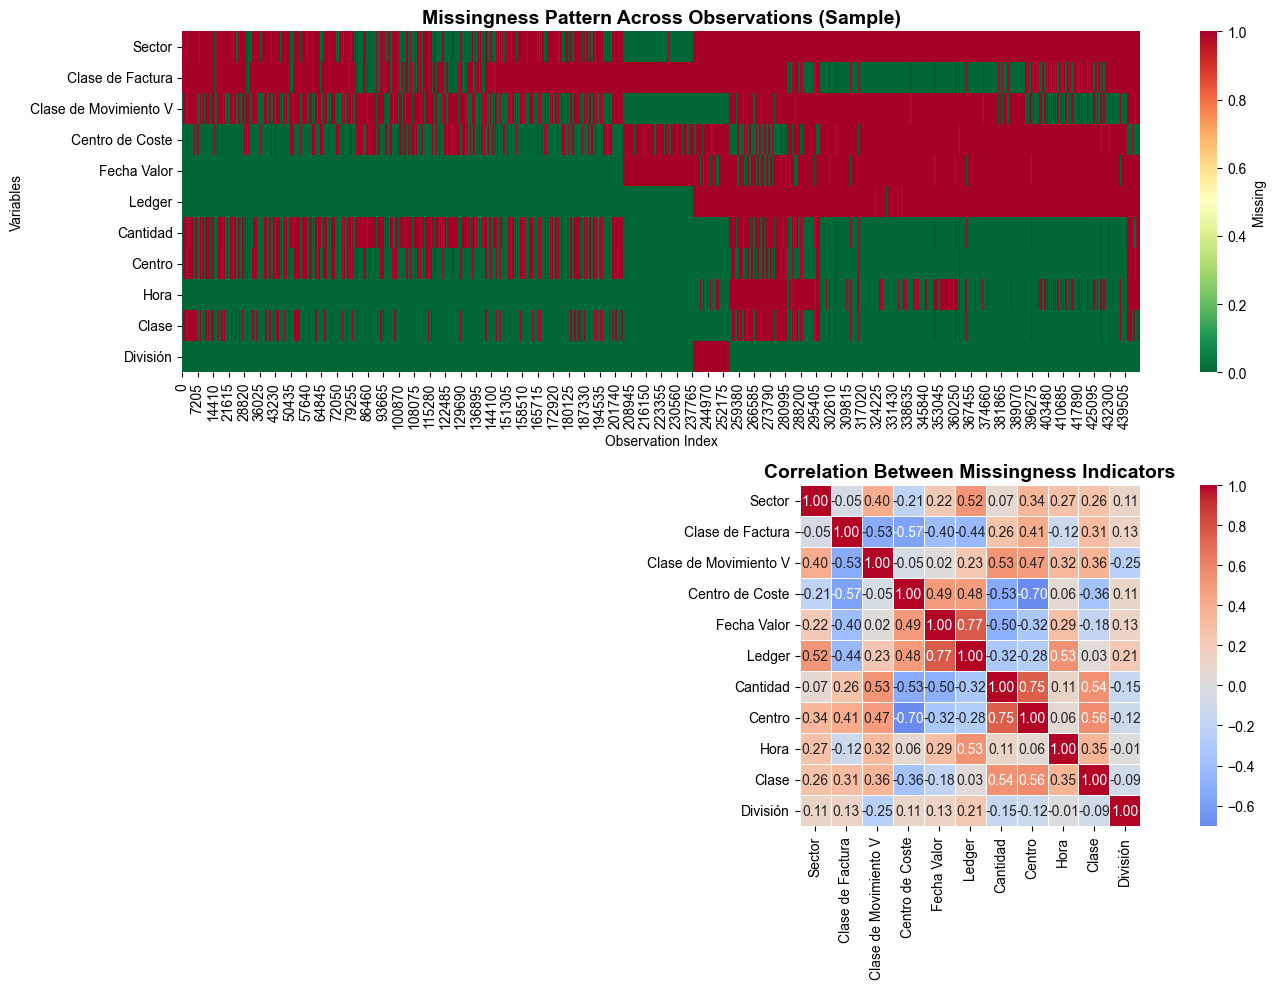


SUMMARY AND RECOMMENDATIONS

Sector:
  Missingness type: MAR or MNAR / MAR
   Recommendation: Multiple Imputation (MICE) or KNN Imputation

Clase de Factura:
  Missingness type: MAR or MNAR / MAR
   Recommendation: Multiple Imputation (MICE) or KNN Imputation

Clase de Movimiento V:
  Missingness type: MAR or MNAR / MAR
   Recommendation: Multiple Imputation (MICE) or KNN Imputation

Centro de Coste:
  Missingness type: MAR or MNAR / MAR
   Recommendation: Multiple Imputation (MICE) or KNN Imputation

Fecha Valor:
  Missingness type: MAR or MNAR / MAR
   Recommendation: Multiple Imputation (MICE) or KNN Imputation

Ledger:
  Missingness type: MAR or MNAR / MAR
   Recommendation: Multiple Imputation (MICE) or KNN Imputation

Cantidad:
  Missingness type: MAR or MNAR / MAR
   Recommendation: Multiple Imputation (MICE) or KNN Imputation

Centro:
  Missingness type: MAR or MNAR / MAR
   Recommendation: Multiple Imputation (MICE) or KNN Imputation

Hora:
  Missingness type: MAR or MNAR / M

In [10]:
from Missing_Data_Analysis import comprehensive_missingness_analysis
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, 
                       message='.*Precision loss occurred in moment calculation.*')

results = comprehensive_missingness_analysis(db, variables_to_impute)

# KNN Imputation
The K-Nearest Neighbors (KNN) imputation method is a technique used to fill in missing values in a dataset by leveraging the K-Nearest Neighbors algorithm. This method estimates missing values based on the values of the "k" most similar data points (neighbors) in the dataset. 

In [11]:
# KNN Imputation

In [12]:
# Heatmap of number of transactions by day and month
# db_heatmap = db.pivot_table(index="Mes Entrada", columns="Dia Entrada", values="Monto (Millones)", aggfunc="count", fill_value=0)
# db_heatmap.index = db_heatmap.index.astype(int)
# db_heatmap.columns = db_heatmap.columns.astype(int)

# plt.figure(figsize=(12, 8))
# sns.heatmap(db_heatmap, cmap="YlGnBu", annot=True, fmt="d")
# plt.title("Transacciones (Entrada) diarias")

In [13]:
# Heatmap of number of transactions by day and month
# db_heatmap = db.pivot_table(index="Mes Valor", columns="Dia Valor", values="Monto (Millones)", aggfunc="count", fill_value=0)
# db_heatmap.index = db_heatmap.index.astype(int)
# db_heatmap.columns = db_heatmap.columns.astype(int)

# plt.figure(figsize=(12, 8))
# sns.heatmap(db_heatmap, cmap="YlGnBu", annot=True, fmt="d")
# plt.title("Transacciones (Valor) diarias")

In [14]:
pio.templates["plotly"].layout.font.family = "Arial"
pio.templates["plotly_white"].layout.font.family = "Arial"
pio.templates.default = "plotly"

In [15]:
# Monto (millones) transado por Centro de Coste
# db_cc_ano = db.groupby(["Centro de Coste"])["Monto (Millones)"].sum().reset_index()

# px.bar(db_cc_ano,
       # x="Centro de Coste",
       # y="Monto (Millones)",
       # title="Monto (Millones) transado por Centro de Coste")

In [16]:
# Promedio Monto (millones) transado por Centro de Coste
# db_cc_ano = db.groupby(["Centro de Coste"])["Monto (Millones)"].mean().reset_index()

# px.bar(db_cc_ano,
       # x="Centro de Coste",
       # y="Monto (Millones)",
       # title="Promedio del Monto (Millones) transado por Centro de Coste")